In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

In [3]:
names = pd.read_csv('names.csv')

In [4]:
pd.set_option('display.max_rows', 30)

In [5]:
names.dtypes

Unnamed: 0           int64
names               object
sexe                object
given_since2013    float64
given_since2018    float64
                    ...   
turkish_names      float64
biblic_names       float64
viking_names       float64
mythology_names    float64
fiction_names      float64
Length: 31, dtype: object

In [6]:
names = names.drop(['Unnamed: 0'], axis=1)

In [7]:
print(names.shape)
print(names.isna().sum().sum())
names.head()

(2954, 30)
0


,names,sexe,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,...,french_names,italian_names,celt_names,english_names,germanic_names,turkish_names,biblic_names,viking_names,mythology_names,fiction_names
0,AALIYAH,F,2166.0,1245.0,1,1,101.379310,53.684211,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AARON,M,22669.0,11797.0,1,1,19.926586,1.644444,5,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ABBY,F,1791.0,1100.0,1,1,107.894737,26.063830,4,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ABDALLAH,M,2297.0,929.0,1,1,-40.384615,-36.213992,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ABDEL,M,80.0,0.0,1,0,-100.000000,-9999.000000,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## need to create 2 models: separate F and M

In [8]:
first_names = names.names
X = names.drop(['names'], axis=1)

In [9]:
X_F = X[X['sexe']== 'F']
X_M = X[X['sexe']== 'M']

In [10]:
X.sexe.value_counts()

sexe
F    1665
M    1289
Name: count, dtype: int64

In [11]:
print(X_F.shape)
X_M.shape

(1665, 29)


(1289, 29)

## X_num & X_cat

In [12]:
XF_num = X_F.select_dtypes('number')
XF_cat = X_F.select_dtypes('object')
XM_num = X_M.select_dtypes('number')
XM_cat = X_M.select_dtypes('object')

In [13]:
print(XF_num.shape)
print(XF_cat.shape)
print(XM_num.shape)
print(XM_cat.shape)

(1665, 26)
(1665, 3)
(1289, 26)
(1289, 3)


## OneHotEncoder and MinMaxScaler

In [14]:
## MinMaxScaler for female

In [16]:
transformerF = MinMaxScaler().fit(XF_num)

XF_num_norm = transformerF.transform(XF_num)
XF_num_norm = pd.DataFrame(XF_num_norm, columns=XF_num.columns)

print(XF_num_norm.shape)
display(XF_num_norm.head())

transformerM = MinMaxScaler().fit(XM_num)

XM_num_norm = transformerM.transform(XM_num)
XM_num_norm = pd.DataFrame(XM_num_norm, columns=XM_num.columns)

print(XM_num_norm.shape)
XM_num_norm.head()

(1665, 26)


,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,...,french_names,italian_names,celt_names,english_names,germanic_names,turkish_names,biblic_names,viking_names,mythology_names,fiction_names
0,0.052289,0.066107,1.0,1.0,0.505069,0.502684,0.307692,0.0,0.0,0.001180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.043236,0.058408,1.0,1.0,0.505395,0.501303,0.076923,0.0,0.0,0.001065,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.307692,0.0,0.0,0.000269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.461538,0.0,0.0,0.000206,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.307692,0.0,0.0,0.000092,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(1289, 26)


,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,...,french_names,italian_names,celt_names,english_names,germanic_names,turkish_names,biblic_names,viking_names,mythology_names,fiction_names
0,0.434081,0.477650,1.0,1.0,0.500996,0.500082,0.214286,0.0,0.0,0.017471,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.043984,0.037614,1.0,1.0,0.497981,0.498189,0.428571,0.0,0.0,0.002005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001532,0.000000,1.0,0.0,0.494999,0.000000,0.214286,0.0,0.0,0.000706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.571429,0.0,0.0,0.004572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.500000,0.0,0.0,0.000404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
## OneHotEncoder for female

In [18]:
encoderF = OneHotEncoder(drop='first').fit(XF_cat) 
colsF = encoderF.get_feature_names_out(input_features=XF_cat.columns)

XF_cat_encoded = pd.DataFrame(encoderF.transform(XF_cat).toarray(),columns=colsF) #to.array() to change the format to Array
print(XF_cat_encoded.shape)
display(XF_cat_encoded.head())

encoderM = OneHotEncoder(drop='first').fit(XM_cat) 
colsM = encoderM.get_feature_names_out(input_features=XM_cat.columns)

XM_cat_encoded = pd.DataFrame(encoderM.transform(XM_cat).toarray(),columns=colsM) #to.array() to change the format to Array
print(XM_cat_encoded.shape)
XM_cat_encoded.head()

(1665, 17)


,category_Popular,category_Rare,category_Uncommon,category_Very Popular,category_Very Rare,decade_popularity_1910s,decade_popularity_1920s,decade_popularity_1930s,decade_popularity_1940s,decade_popularity_1950s,decade_popularity_1960s,decade_popularity_1970s,decade_popularity_1980s,decade_popularity_1990s,decade_popularity_2000s,decade_popularity_2010s,decade_popularity_2020s
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


(1289, 17)


,category_Popular,category_Rare,category_Uncommon,category_Very Popular,category_Very Rare,decade_popularity_1910s,decade_popularity_1920s,decade_popularity_1930s,decade_popularity_1940s,decade_popularity_1950s,decade_popularity_1960s,decade_popularity_1970s,decade_popularity_1980s,decade_popularity_1990s,decade_popularity_2000s,decade_popularity_2010s,decade_popularity_2020s
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
XF_transf = pd.concat([XF_num_norm, XF_cat_encoded], axis=1)
print(XF_transf.shape)
display(XF_transf.head())

XM_transf = pd.concat([XM_num_norm, XM_cat_encoded], axis=1)
print(XM_transf.shape)
XM_transf.head()

(1665, 43)


,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,...,decade_popularity_1930s,decade_popularity_1940s,decade_popularity_1950s,decade_popularity_1960s,decade_popularity_1970s,decade_popularity_1980s,decade_popularity_1990s,decade_popularity_2000s,decade_popularity_2010s,decade_popularity_2020s
0,0.052289,0.066107,1.0,1.0,0.505069,0.502684,0.307692,0.0,0.0,0.001180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.043236,0.058408,1.0,1.0,0.505395,0.501303,0.076923,0.0,0.0,0.001065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.307692,0.0,0.0,0.000269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.461538,0.0,0.0,0.000206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.307692,0.0,0.0,0.000092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


(1289, 43)


,given_since2013,given_since2018,given_2013_yn,given_2018_yn,popularity_10y,popularity_5y,lenght,hyphen,neutral,given_total,...,decade_popularity_1930s,decade_popularity_1940s,decade_popularity_1950s,decade_popularity_1960s,decade_popularity_1970s,decade_popularity_1980s,decade_popularity_1990s,decade_popularity_2000s,decade_popularity_2010s,decade_popularity_2020s
0,0.434081,0.477650,1.0,1.0,0.500996,0.500082,0.214286,0.0,0.0,0.017471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.043984,0.037614,1.0,1.0,0.497981,0.498189,0.428571,0.0,0.0,0.002005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.001532,0.000000,1.0,0.0,0.494999,0.000000,0.214286,0.0,0.0,0.000706,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.571429,0.0,0.0,0.004572,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.500000,0.0,0.0,0.000404,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## K means Model

C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

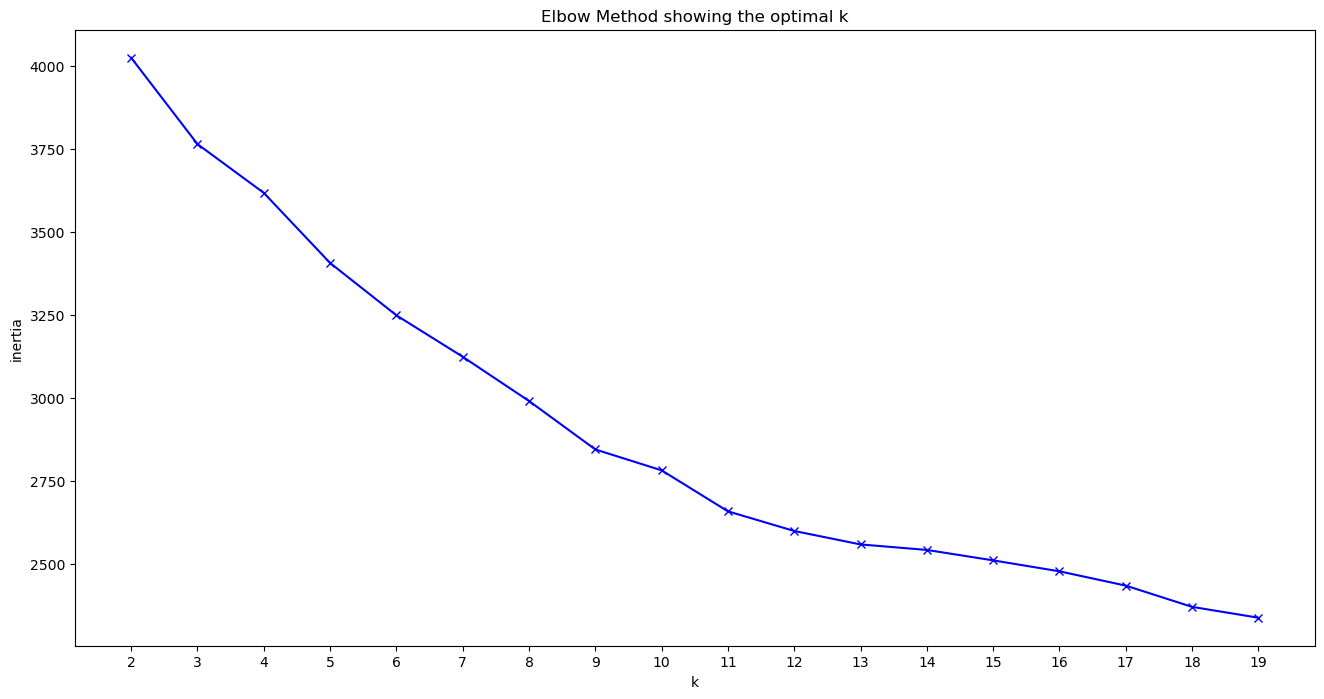

In [20]:
K = range(2, 20)
inertia = []

for k in K:
    kmeansF = KMeans(n_clusters=k,
                    n_init='auto',
                    random_state=789)
    kmeansF.fit(XF_transf)
    inertia.append(kmeansF.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [21]:
# let's see the sihlouette score

C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

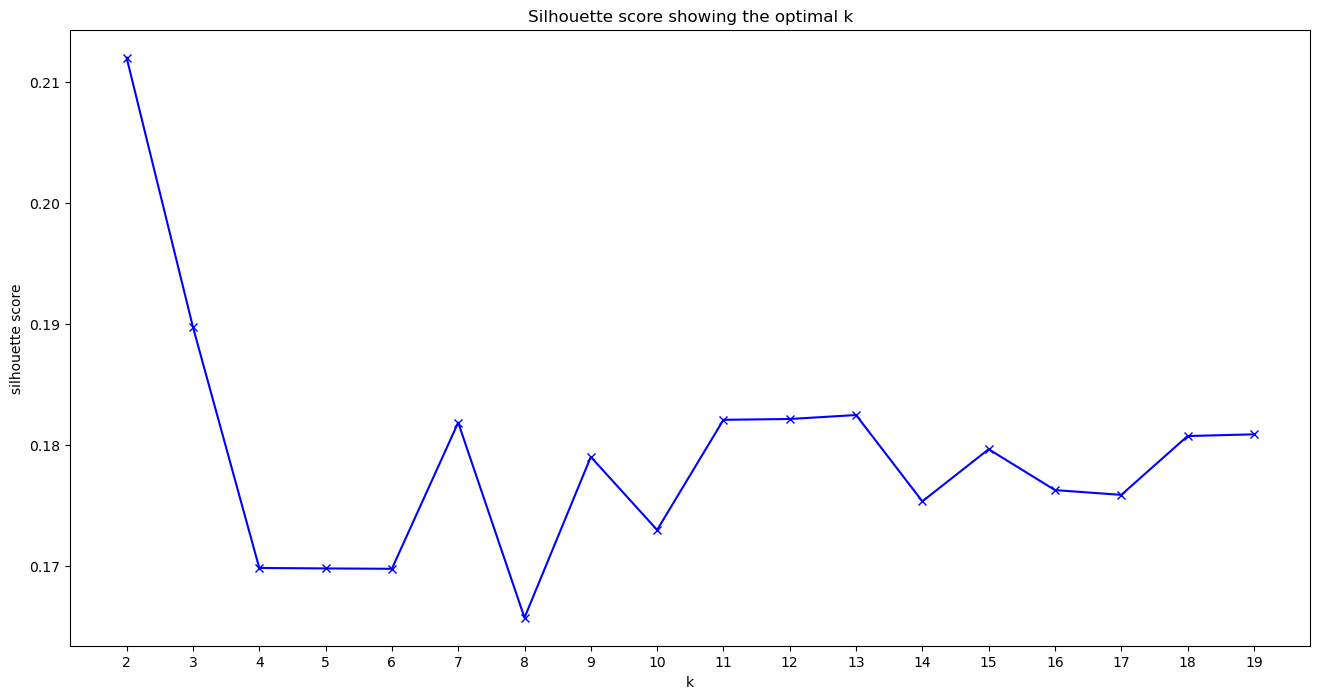

In [22]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeansF = KMeans(n_clusters=k,
                    n_init='auto',
                    random_state=789)
    kmeansF.fit(XF_transf)
    silhouette.append(silhouette_score(XF_transf, kmeansF.predict(XF_transf)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

In [23]:
# pick at 13

In [24]:
kmeansF = KMeans(n_clusters=13, random_state=789)
kmeansF.fit(XF_transf)
print(kmeansF.inertia_)

C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


2495.7640943066767


C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

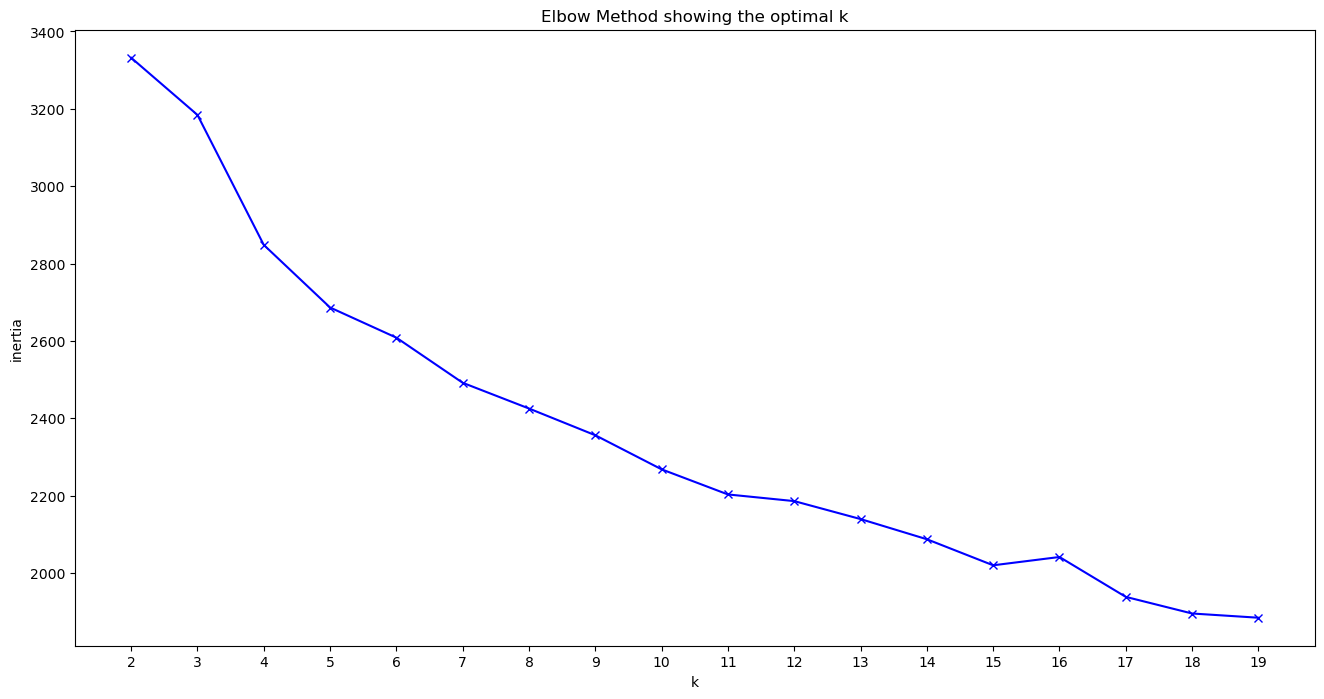

In [25]:
K = range(2, 20)
inertia = []

for k in K:
    kmeansM = KMeans(n_clusters=k,
                    n_init='auto',
                    random_state=789)
    kmeansM.fit(XM_transf)
    inertia.append(kmeansM.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

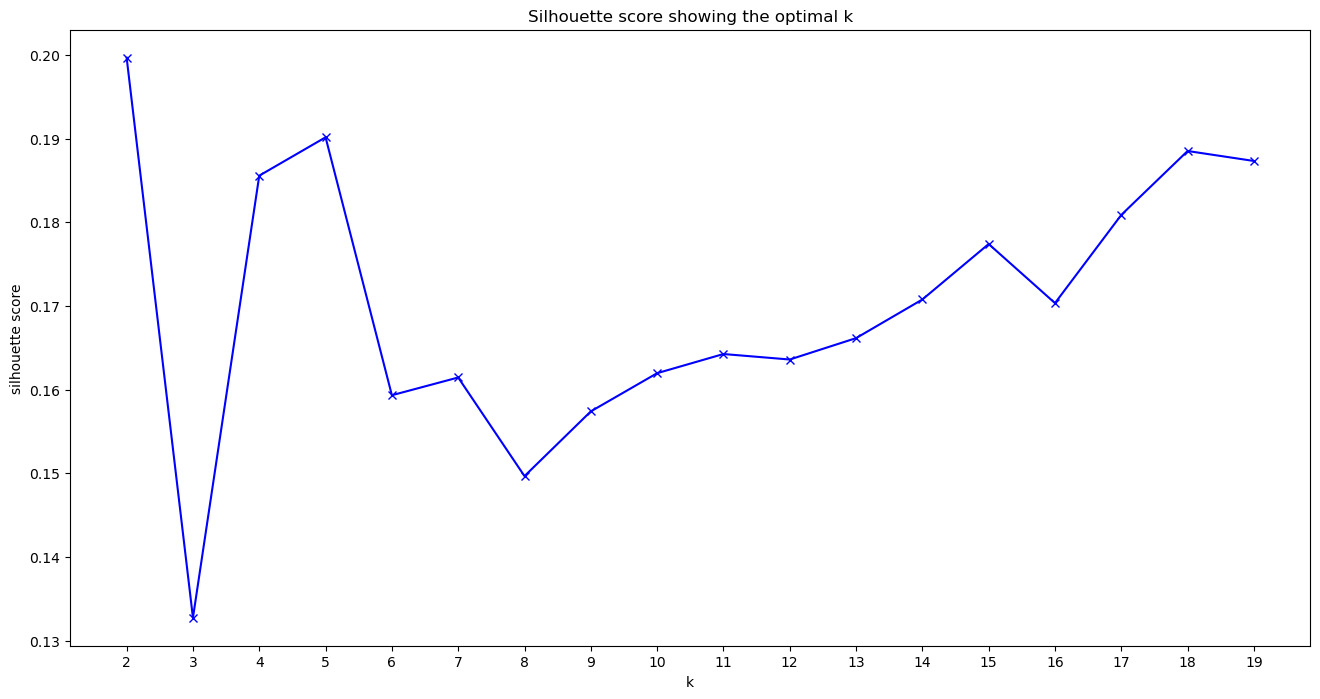

In [26]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeansM = KMeans(n_clusters=k,
                    n_init='auto',
                    random_state=789)
    kmeansM.fit(XM_transf)
    silhouette.append(silhouette_score(XM_transf, kmeansM.predict(XM_transf)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

In [27]:
kmeansM = KMeans(n_clusters=18, random_state=789)
kmeansM.fit(XM_transf)
print(kmeansM.inertia_)

C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


1883.1009731032311


## Concat Dataset names with the clusters

In [29]:
clustersF = kmeansF.predict(XF_transf)
pd.Series(clustersF).value_counts().sort_index()

0      53
1     137
2     107
3     133
4     303
5      84
6      71
7      89
8     152
9     136
10    199
11     83
12    118
Name: count, dtype: int64

In [32]:
clustersM = kmeansM.predict(XM_transf)
pd.Series(clustersM).value_counts().sort_index()

0      44
1      87
2      76
3      28
4      73
5      98
6     103
7      43
8      24
9      99
10     63
11     85
12     70
13     81
14     66
15    157
16     66
17     26
Name: count, dtype: int64

In [34]:
df_clustersF = pd.DataFrame(clustersF, columns=['clusters'])
df_clustersM = pd.DataFrame(clustersM, columns=['clusters'])

,clusters
0,3
1,15
2,5
3,14
4,2
...,...
1284,6
1285,5
1286,9
1287,15


In [ ]:
names_clusters = pd.concat([names, df_clusters], axis=1)

In [ ]:
names_clusters[names_clusters['clusters']== 15]

## recommandations

1- ask for input: "give me a name you like"
2- search the input in our names_cluster DF
3- give another name from the cluster

4- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)

5a- if yes, give another name from the same cluster
5b- if not, give a name from another cluster

6- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)

7a- if yes, give another name from the same cluster 
7b- if not, give a name from another cluster

STOP


In [ ]:
def recommended_name(names_clusters, input_name):
# 1- Ask for input 
    input_name = input_name.upper()
    
# 2- search the input in our names_cluster DF
    cluster_label = names_clusters[names_clusters['names'] == input_name]['clusters'].iloc[0]
    random_names = names_clusters[names_clusters['clusters'] == cluster_label]
    
# 3- give another name from the cluster
    recommended_name = random_names[random_names['names'] != input_name].sample(n=1).iloc[0][0]
       
    print(f"Our recommendation is {recommended_name}.")
        
# 4- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)  
    input_question = input('Do you like this name? please answer yes or no: ')
    
    while input_question.lower() not in ['yes', 'no']:
        print('Your answer is incorrect, please try again')
        input_question = input('Do you like this name? please answer yes or no: ')
    
# 5a- if yes, give another name from the same cluster
    if input_question.lower() == 'yes':
        recommended_name2 = random_names[(random_names['names'] != input_name) & (random_names['names'] != recommended_name)].sample(n=1).iloc[0][0]
        print(f"Our next recommendation is {recommended_name2}.")
        
    else:
# 5b- if not, give a name from another cluster
        different_cluster = names_clusters[names_clusters['clusters'] != cluster_label]
        recommended_name3 = different_cluster.sample(n=1)['names'].iloc[0]
        print(f"Our next recommendation is {recommended_name3}.")

# 6- ask for input: Do you like the name? yes or no? (if error: please enter yes or no)
    input_question = input('Do you like this name? please answer yes or no: ')
    
    while input_question.lower() not in ['yes', 'no']:
        print('Your answer is incorrect, please try again')
        input_question = input('Do you like this name? please answer yes or no: ')

# 7a- if yes, give another name from the same cluster
    if input_question.lower() == 'yes':
        recommended_name4 = random_names[(random_names['names'] != input_name) & (random_names['names'] != recommended_name) & (random_names['names'] != recommended_name2)].sample(n=1).iloc[0][0]
        print(f"Our last recommendation is {recommended_name4}. Thank you for using our recommender")
        
    else:
# 7b- if not, give a name from another cluster
        different_cluster2 = names_clusters[(names_clusters['clusters'] != cluster_label) & (names_clusters['clusters'] != different_cluster)]
        recommended_name5 = different_cluster2.sample(n=1)['names'].iloc[0]
        print(f"Our last recommendation is {recommended_name3}. Thank you for using our recommender")


In [ ]:
user_input = input("Enter a name you like: ")
recommended_name(names_clusters, user_input)

In [ ]:
names_clusters[names_clusters['names']== 'ABDEL']
#names_clusters[names_clusters['names']== 'SIHEM']

In [ ]:
label = names_clusters[names_clusters['names'] == 'LEA']['clusters'].iloc[0]

In [ ]:
rand = names_clusters[names_clusters['clusters'] == label]

In [ ]:
rand

In [ ]:
rand_name = rand[rand['names'] != 'LEA'].sample(n=1).iloc[0][0]

In [ ]:
rand_name

In [ ]:
rand_no = names_clusters[names_clusters['clusters'] != label]

In [ ]:
rand_no

In [ ]:
rand_name2 = rand[(rand['names'] != 'LEA') & (rand['names'] != 'MAHE')].sample(n=1).iloc[0][0]

In [ ]:
rand_name2